In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'used-cars-price-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F245550%2F518431%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240417%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240417T140029Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D754a9bca51df21625531c125f003084f9574a6b14835fd60a07f518f3e0449ac7037865064c577226f4f3d8a93a969d325592c292a5ff0fe6c9e8f46dd634ed548265c0f7326f3b43ab02e95eace0cb6fc4486b539b591376c8163ad36765ea99ad4991aaf67d1c90c218ed5417b3dec56b6881a766d248ecc64f355f9116d9ad6bed6080dc81c1d754287d9dfe458e0470035c081381272d949549f71754beff3bc2d9f72f9716acdfdb29825e80de1d71a9723957cdd06ce3a6351ccee51c1bc45d027526ef1dc3cb92e11e1608e34e89a1ffdd6227a4362d5233bb071f61b0b34c708f30ea8e5f7386e50bea904471a151a71f1b667587c9d80cffd6b04bf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 175737 bytes downloaded
Downloaded and uncompressed: used-cars-price-prediction
Data source import complete.


<div style="font-family: 'Times New Roman', Times, serif; text-align: center;">
    <h3 style="color: black; font-size: 32px;">Used Car Price Prediction 🚗</h3>
</div>

![car_ind.jpg](attachment:367b3abc-8054-44fe-b847-e59cb369c6d6.jpg)<img src='car_ind.jpg'/>

<div style="font-family: 'Times New Roman', Times, serif; text-align: center;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">This dataset reports second-hand car sales in various parts of India.</h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: center;">
    <i><h3 style="color: black; font-size: 16px; font-weight: normal;">Detailed information will be given in the descriptions.</h3></i>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>About Features:</b></h3>
</div>

<div style="background-color: #FFFFFF; padding: 5px; border: 2px solid #000000; border-radius: 5px; text-align: center;">
    <table style="width:100%; text-align: center;">
        <tr>
            <th style="text-align:left; font-size: 18px;">Feature</th>
            <th style="text-align:left; font-size: 18px;">Explanation</th>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Name</td>
            <td style="text-align:left; font-size: 16px;">Brand and model of the car</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Location</td>
            <td style="text-align:left; font-size: 16px;">Where the vehicle is sold or can be purchased</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Year</td>
            <td style="text-align:left; font-size: 16px;">Release year of the model</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Kilometers_Driven</td>
            <td style="text-align:left; font-size: 16px;">Total mileage on the vehicle by the previous owner(s)</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Fuel_Type</td>
            <td style="text-align:left; font-size: 16px;">The type of fuel the car uses</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Transmission</td>
            <td style="text-align:left; font-size: 16px;">The type of gear the car uses</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Owner_Type</td>
            <td style="text-align:left; font-size: 16px;">Indicates how many previous owners the vehicle has had</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Mileage</td>
            <td style="text-align:left; font-size: 16px;">Standard mileage offered by the car company in kmpl or km/kg</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Engine</td>
            <td style="text-align:left; font-size: 16px;">Engine displacement in cc</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Power</td>
            <td style="text-align:left; font-size: 16px;">Maximum power of the engine in bhp</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Seats</td>
            <td style="text-align:left; font-size: 16px;">Number of seats in the vehicle</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">New_Price</td>
            <td style="text-align:left; font-size: 16px;">The price of a new car of the same model</td>
        </tr>
        <tr>
            <td style="text-align:left; font-size: 16px;">Price</td>
            <td style="text-align:left; font-size: 16px;">Price of the vehicle in Indian rupees</td>
        </tr>
    </table>
</div>


<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step 1. Importing the Essential Librariesand Metrics</b></h3>
</div>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step 2. Loading the Data</b></h3>
</div>

In [ ]:
df = pd.read_csv("/kaggle/input/used-cars-price-prediction/train-data.csv")

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step 3. Overviewing the Data</b></h3>
</div>

In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.shape

(6019, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            As seen here, some data types are not as desired. Therefore it needs to be replaced. "kmpl", "cc", "bhp" expressions should be removed.
        </h3>
    </div>
</div>

In [ ]:
# Description of Numeric Columns:
df.describe(include='number')

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
# Description of Object Columns:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step 4. Preparing the Data</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>4.1 Format Editing</b></h3>
</div>

In [ ]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            The "Unnamed: 0" column, which will not be used, and the "New_Price" column, which has a lot of missing data, have been dropped.
        </h3>
    </div>
</div>

In [ ]:
df.duplicated().sum()
# df[df.duplicated(keep=False)]

0

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            There is no duplicate data. Now let's fix the data types for the "Mileage", "Engine", "Power" columns.
        </h3>
    </div>
</div>

In [ ]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [ ]:
df['Power'] = df['Power'].replace('null bhp',None)
print('The number of data appearing as "null nhp":', (df['Power'] == 'null bhp').sum())
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

The number of data appearing as "null nhp": 0


In [ ]:
# Taking a look at the first 5 rows of the dataset
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [ ]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            The conversion process is complete. However, as seen above, missing data must be edited. Since removing missing data may lead to undesirable results, it would be better to fill it in with the mean or median.
        </h3>
    </div>
</div>

In [ ]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)
df['Seats'].fillna(df['Seats'].mean(), inplace=True)

In [ ]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>4.2 Finding The Outliers</b></h3>
</div>

In [ ]:
df.shape

(6019, 12)

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 18px;">
    <div style="text-align: left;">
        <p style="font-size: 18px;">Removing an observation simply because it is an outlier is not an acceptable approach. These may be legitimate observations, and it is important to investigate why the outlier is the way it is before deciding whether to drop it. We are only allowed to remove outliers in the following two cases:</p>
        <ol style="font-size: 18px;">
            <li><em>If the outlier is caused by incorrectly entered or measured data</em></li>
            <li><em>If the outlier creates a significant relationship</em></li>
        </ol>
        <p style="font-size: 18px;">When the columns with outliers in the numeric data type are examined, it will be appropriate to perform operations only on the 'Kilometers_Driven' column.
        </p>
        <p style="font-size: 18px;"><em>IQR</em> or <em>Z-Score</em> can be used to identify outliers.</p>
    </div>
</div>

In [ ]:
# Calculating Z-Score
z_scores = stats.zscore(df["Kilometers_Driven"])

# Identifying outliers using Z-Score
threshold = 2.5  # Usually 2.5 or 3 can be chosen
outliers = df['Kilometers_Driven'][abs(z_scores) > threshold]

outliers

340      775000
358      620000
1528     299322
1860     720000
2328    6500000
2823     480000
3092     480000
3649     300000
4491     445000
Name: Kilometers_Driven, dtype: int64

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            We can see that the highest value is 6,500,000. It is obvious that this number is really extreme compared to other values. Therefore, data after a certain interval should not be included in the process by removing them from the data set. It would be logical to choose 300,000 as the limit.  
        </h3>
    </div>
</div>

In [ ]:
df = df[df["Kilometers_Driven"] <= 300000]

In [ ]:
df["Seats"].min()

0.0

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            At the same time, when the number of seats is examined, this row should be removed since it would not make sense to have a vehicle with 0 seats.
        </h3>
    </div>
</div>

In [ ]:
df = df[df['Seats'] != 0]

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>4.3 Editing Features</b></h3>
</div>

In [ ]:
df['Name'].nunique()

1874

In [ ]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4639,Hyundai EON D Lite Plus,Bangalore,2013,45010,Petrol,Manual,Second,21.1,814.0,55.2,5.0,2.95


In [ ]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            The "Name" column was divided into two as manufacturer and model by splitting it with the "split" command.
        </h3>
    </div>
</div>

In [ ]:
df['Company'].nunique() , df['Model'].nunique()

(30, 215)

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            It may be useful to create two new columns during the modeling phase. Finally, preparations for step 5 should be made by arranging the column order categorically and numerically.
        </h3>
    </div>
</div>

In [ ]:
new_order = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission',
             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df = df.reindex(columns=new_order)

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step 5. Exploratory Data Analysis</b></h3>
</div>

In [ ]:
df.sample()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
1094,maruti,maruti vitara,Kolkata,First,Diesel,Manual,2017,35000,24.3,1248.0,88.5,5.0,6.5


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            <p>
                <strong>Categorical Variables:</strong>
                'Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission'
            </p>
            <p>
                <strong>Numeric Variables:</strong>
                'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'
            </p>
        </h3>
    </div>
</div>

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            <p>
                <strong>For Continuous Data:</strong>
                "Histograms" can be used to obtain information about the distribution of each feature. This allows us to understand the central tendency and shape of the distribution of the dataset.
            </p>
            <p>
                <strong>For Categorical Data:</strong>
                 "Countplot" can be used to visualize the frequency of each category. This provides a clear representation of the importance of each category within the relevant feature.
            </p>
        </h3>
    </div>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>5.1 Univariate Analysis for Categorical Variables</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.1.1 "Company"</b></h3>
</div>

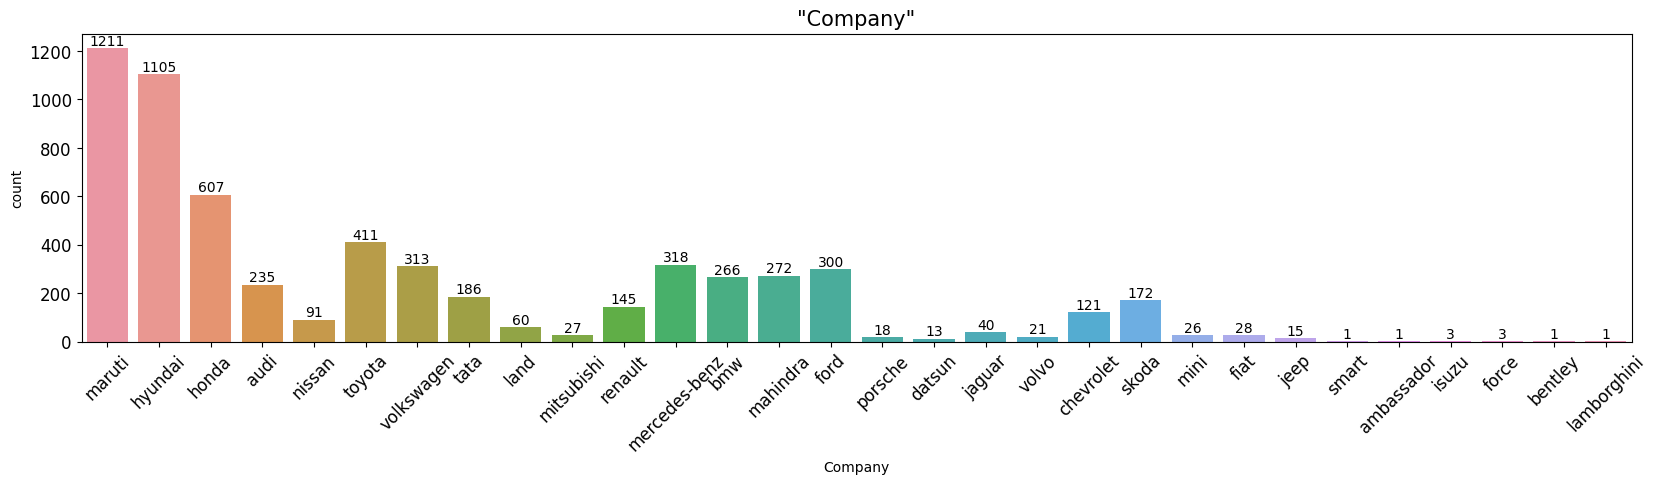

In [ ]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Company')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Company"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.1.2 "Model"</b></h3>
</div>

In [ ]:
df.Model.value_counts()

Model
maruti swift          353
honda city            269
hyundai i20           246
hyundai verna         170
toyota innova         164
                     ... 
fiat petra              1
volkswagen beetle       1
ambassador classic      1
smart fortwo            1
jaguar f                1
Name: count, Length: 215, dtype: int64

In [ ]:
threshold = 10
counts = df['Model'].value_counts()
filtered_models = counts[counts >= threshold].index.tolist()
df = df[df['Model'].isin(filtered_models)]

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            For a better understanding of the "Model" column, models with frequencies less than 10 were not included in the graph.
        </h3>
    </div>
</div>

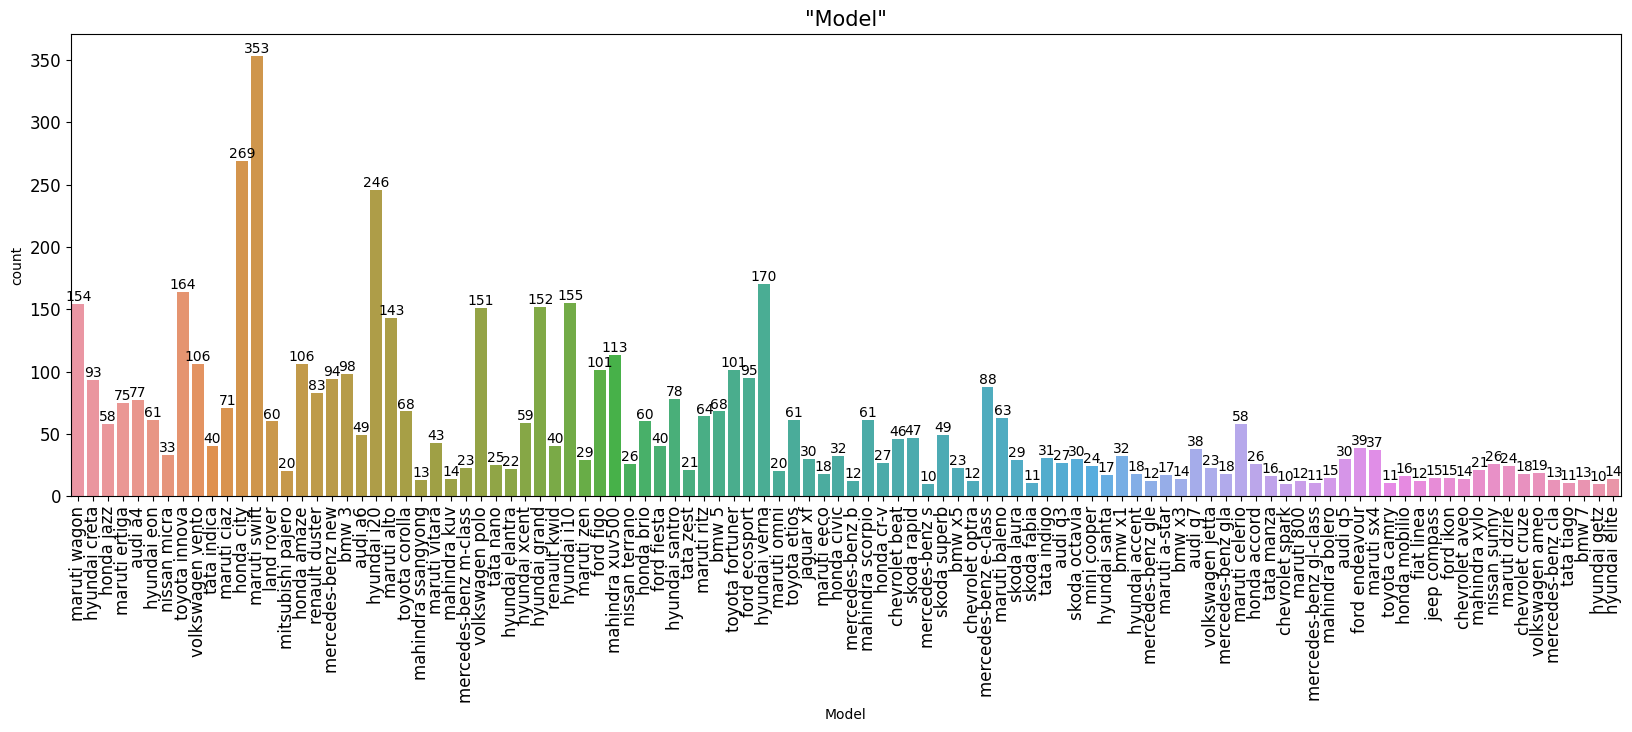

In [ ]:
plt.figure(figsize=(20,6), dpi=100)
graph = sns.countplot(data=df, x='Model')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Model"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.1.3 "Location"</b></h3>
</div>

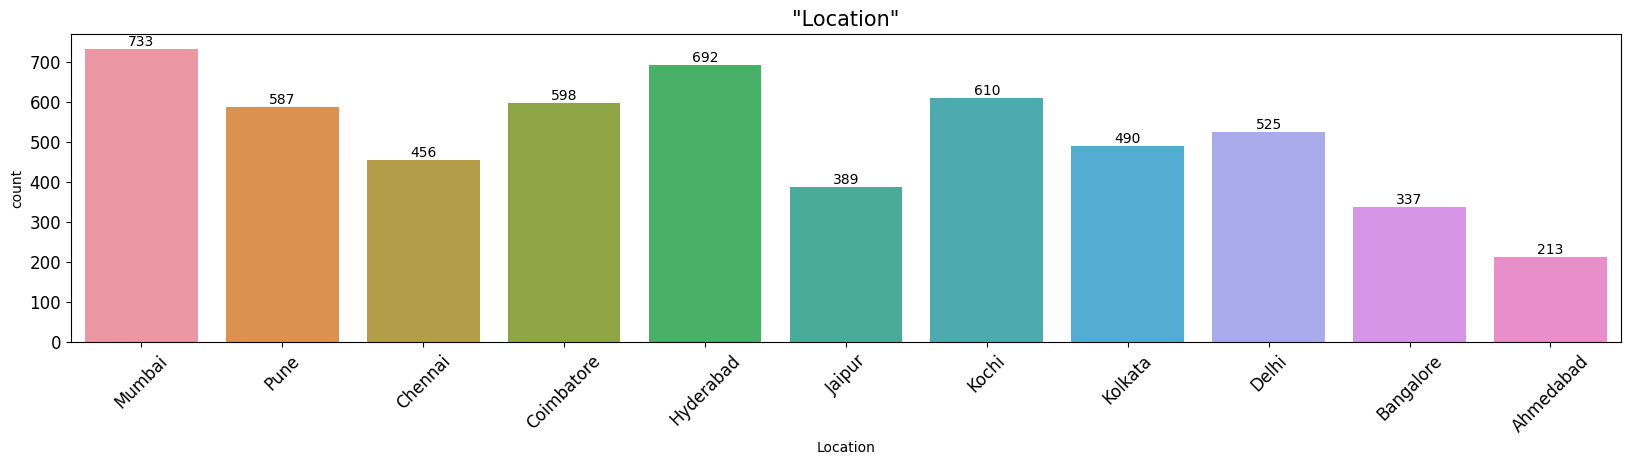

In [ ]:
plt.figure(figsize=(20,4), dpi=100)
graph = sns.countplot(data=df, x='Location')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Location"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.1.4 "Owner_Type"</b></h3>
</div>

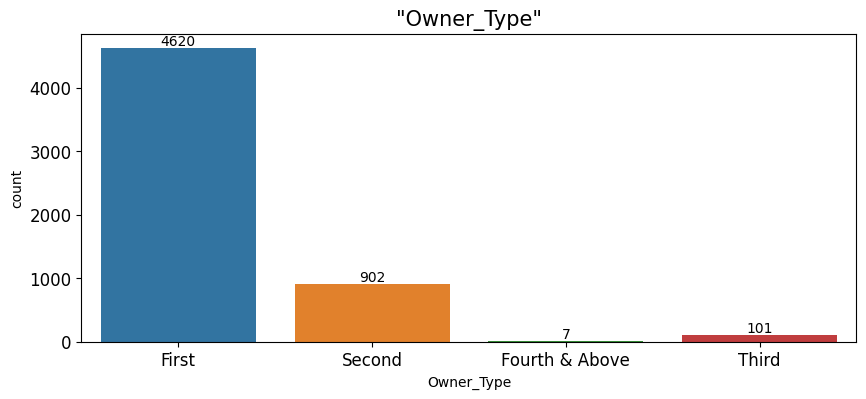

In [ ]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Owner_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Owner_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.1.5 "Fuel_Type"</b></h3>
</div>

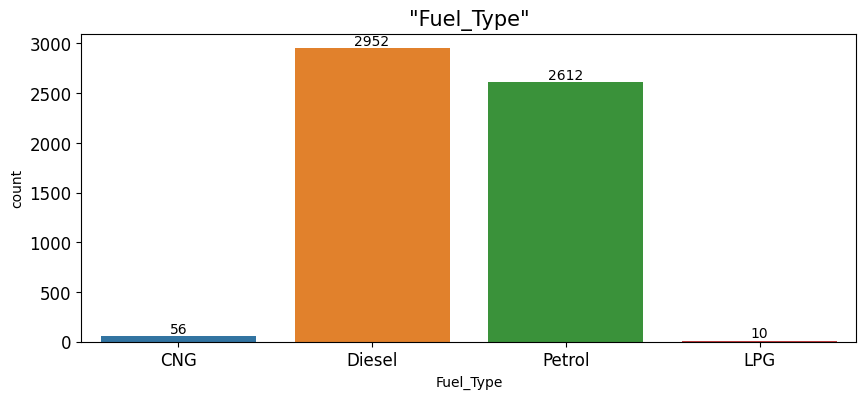

In [ ]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Fuel_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Fuel_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.1.6 "Transmission"</b></h3>
</div>

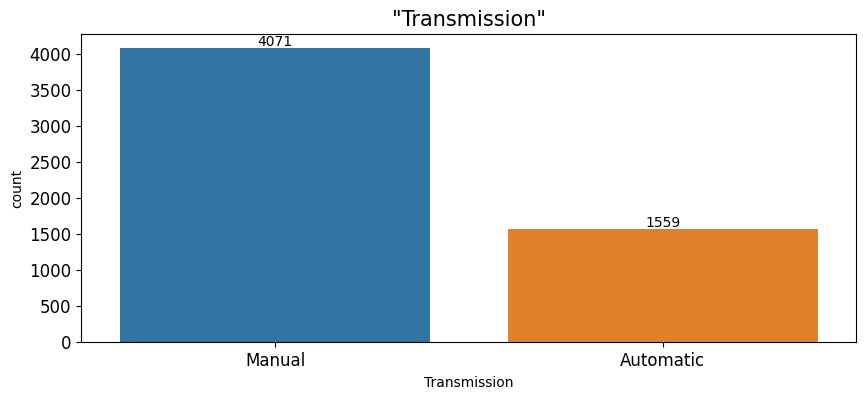

In [ ]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Transmission')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Transmission"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Suzuki brand is the most seen brand in the automobile manufacturer market.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Maruti Swift model is the best selling vehicle.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- The city with the most vehicle sales is Mumbai.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Vehicles from the first owner are usually seen on the market.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- As a fuel type, petrol has the highest frequency and LPG has the lowest frequency.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Manual vehicles are sold more than automatic vehicles.</p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>5.2 Univariate Analysis for Numerical Variables</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.2.1 "Year"</b></h3>
</div>

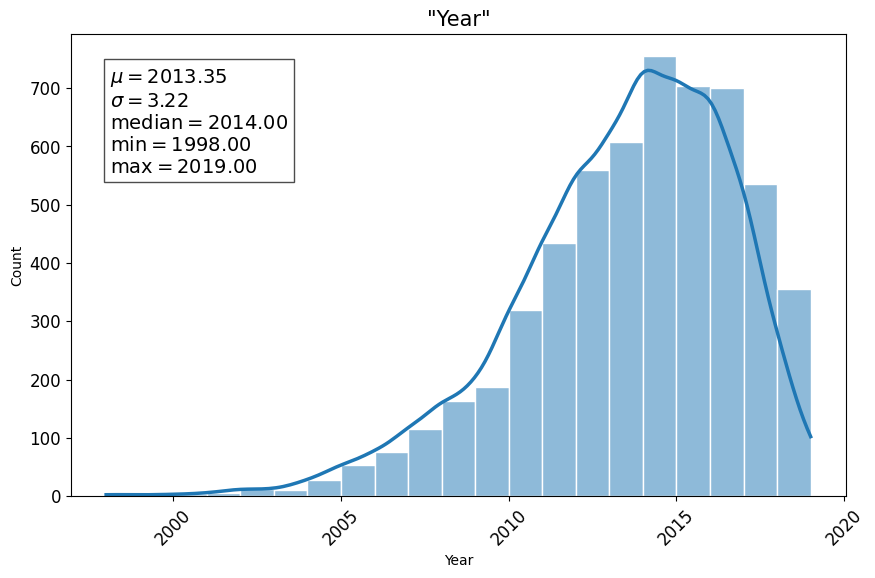

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Year', bins=21, # 1998-2019 arası olduğu için
                     kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Year"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Year'].mean(),
    r'$\sigma=%.2f$' %df['Year'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Year']),
    r'$\mathrm{min}=%.2f$' %df['Year'].min(),
    r'$\mathrm{max}=%.2f$' %df['Year'].max()
))

plt.text(0.05, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.2.2 "Kilometers_Driven"</b></h3>
</div>

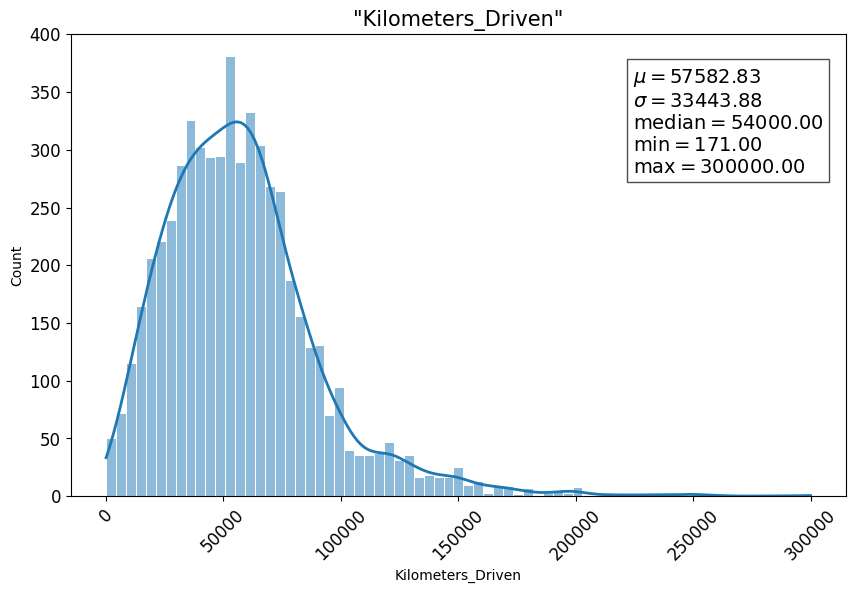

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Kilometers_Driven', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Kilometers_Driven"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Kilometers_Driven'].mean(),
    r'$\sigma=%.2f$' %df['Kilometers_Driven'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Kilometers_Driven']),
    r'$\mathrm{min}=%.2f$' %df['Kilometers_Driven'].min(),
    r'$\mathrm{max}=%.2f$' %df['Kilometers_Driven'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.2.3 "Mileage"</b></h3>
</div>

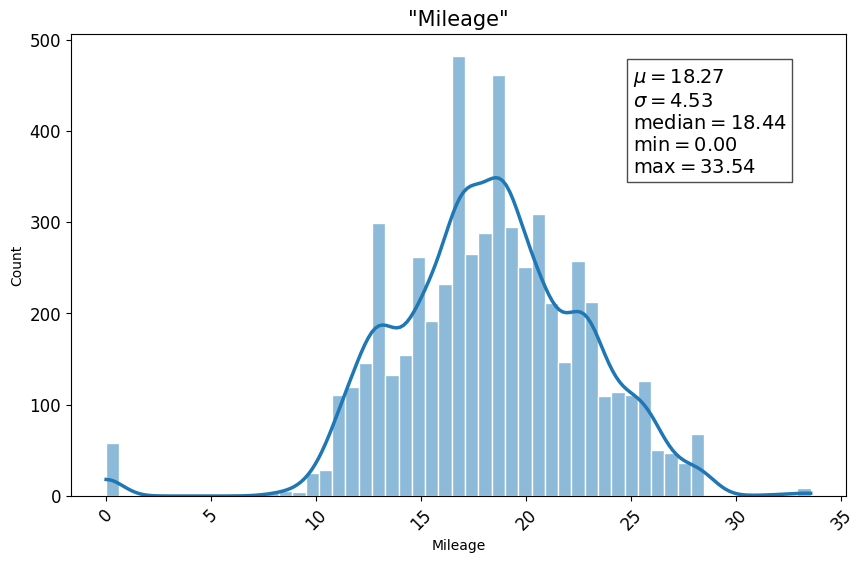

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Mileage', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Mileage"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Mileage'].mean(),
    r'$\sigma=%.2f$' %df['Mileage'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Mileage']),
    r'$\mathrm{min}=%.2f$' %df['Mileage'].min(),
    r'$\mathrm{max}=%.2f$' %df['Mileage'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.2.4 "Engine"</b></h3>
</div>

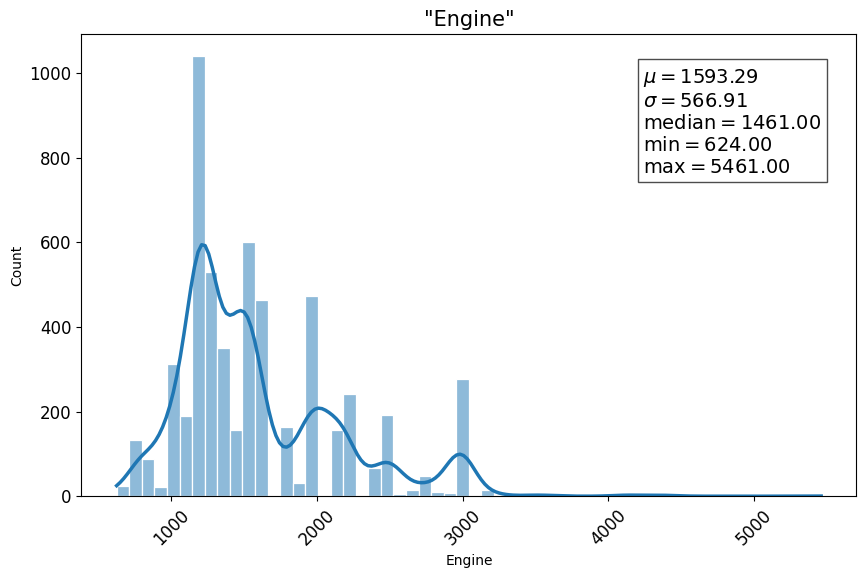

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Engine', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Engine"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Engine'].mean(),
    r'$\sigma=%.2f$' %df['Engine'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Engine']),
    r'$\mathrm{min}=%.2f$' %df['Engine'].min(),
    r'$\mathrm{max}=%.2f$' %df['Engine'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.2.5 "Power"</b></h3>
</div>

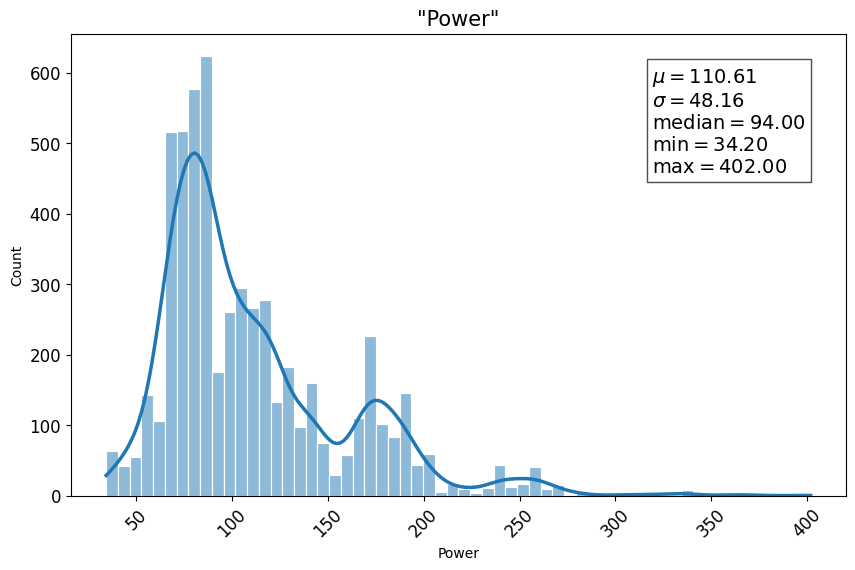

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Power', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Power"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Power'].mean(),
    r'$\sigma=%.2f$' %df['Power'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Power']),
    r'$\mathrm{min}=%.2f$' %df['Power'].min(),
    r'$\mathrm{max}=%.2f$' %df['Power'].max()
))

plt.text(0.75, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.2.6 "Seats"</b></h3>
</div>

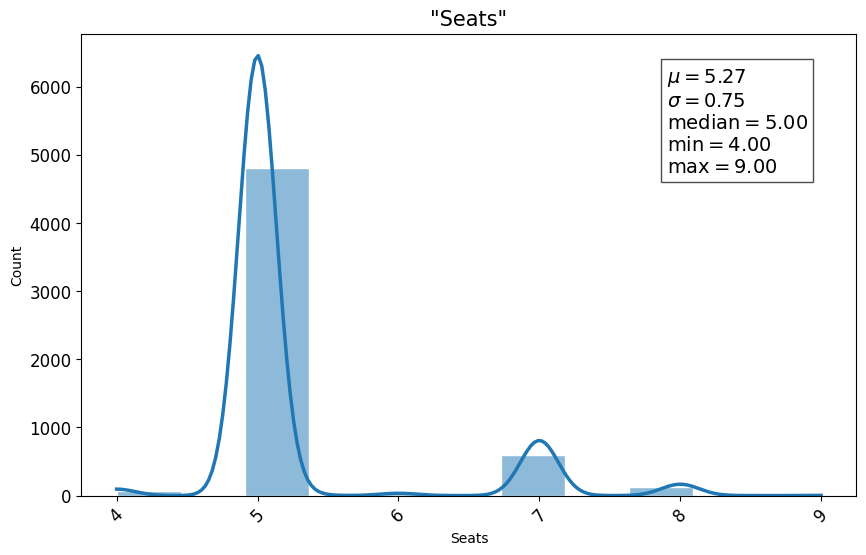

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Seats', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Seats"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Seats'].mean(),
    r'$\sigma=%.2f$' %df['Seats'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Seats']),
    r'$\mathrm{min}=%.2f$' %df['Seats'].min(),
    r'$\mathrm{max}=%.2f$' %df['Seats'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.2.7 "Price"</b></h3>
</div>

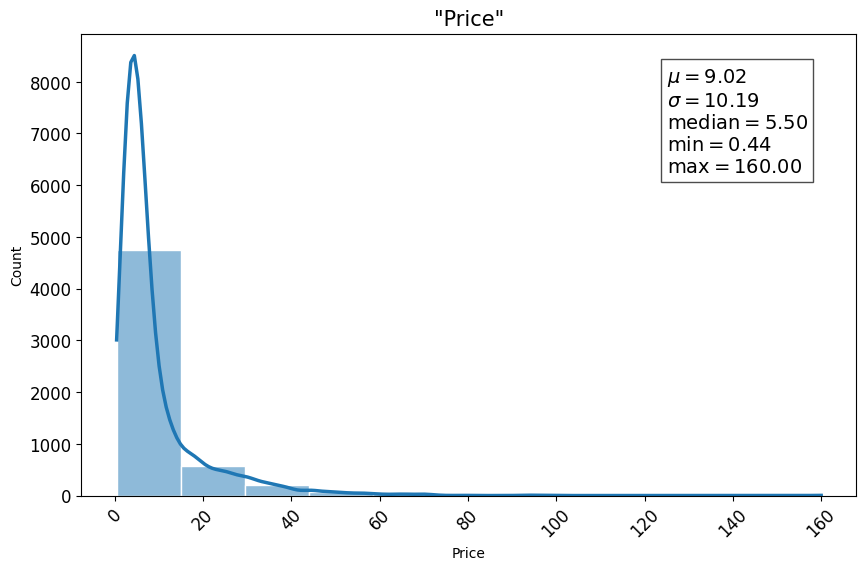

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Price', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Price"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Price'].mean(),
    r'$\sigma=%.2f$' %df['Price'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Price']),
    r'$\mathrm{min}=%.2f$' %df['Price'].min(),
    r'$\mathrm{max}=%.2f$' %df['Price'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Graphs are often skewed to the right. Generally, mean, median and mode values may differ from each other. In this case, higher values are found with lower density in the data set, while lower values occur more frequently.
    </p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>5.3 Bivariate Analysis for Categorical Variables</b></h3>
</div>

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            <p>
                <strong>For Continuous Data:</strong>
                "Scatterplot" can be used to show the relationship between two different continuous variables. Each point corresponds to an observation or data point in the data set.
            </p>
            <p>
                <strong>For Categorical Data:</strong>
                "Stripplot" can be used to show the relationship of a categorical variable to a continuous variable. Stripplot shows points on an axis where the points are distributed along a horizontal line. These points are often used to better understand the data distribution and visualize possible clusters. Each point represents the actual value of the data points.
            </p>
        </h3>
    </div>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.3.1 Price vs Company</b></h3>
</div>

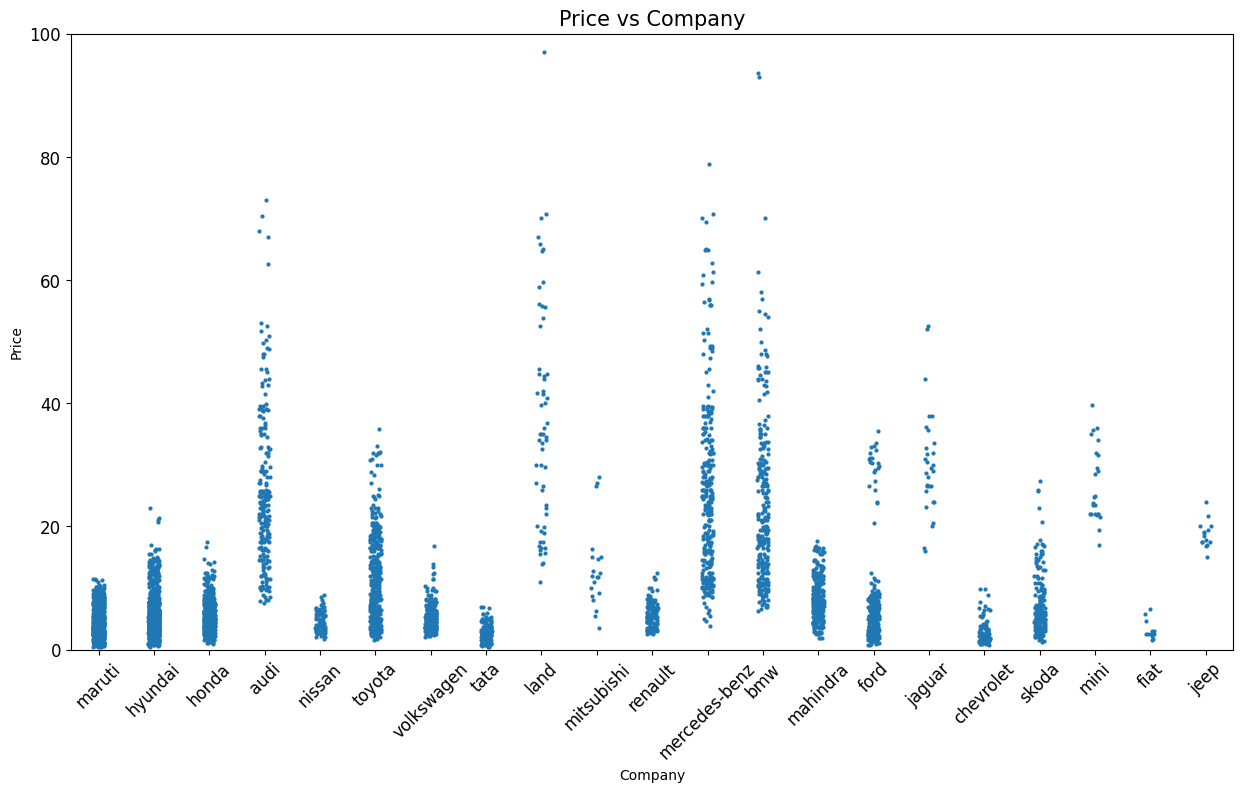

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Company', y='Price', data=df, size=3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100]) # The y-axis is limited to 100 to make it look better
plt.title('Price vs Company', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.3.2 Price vs Location</b></h3>
</div>

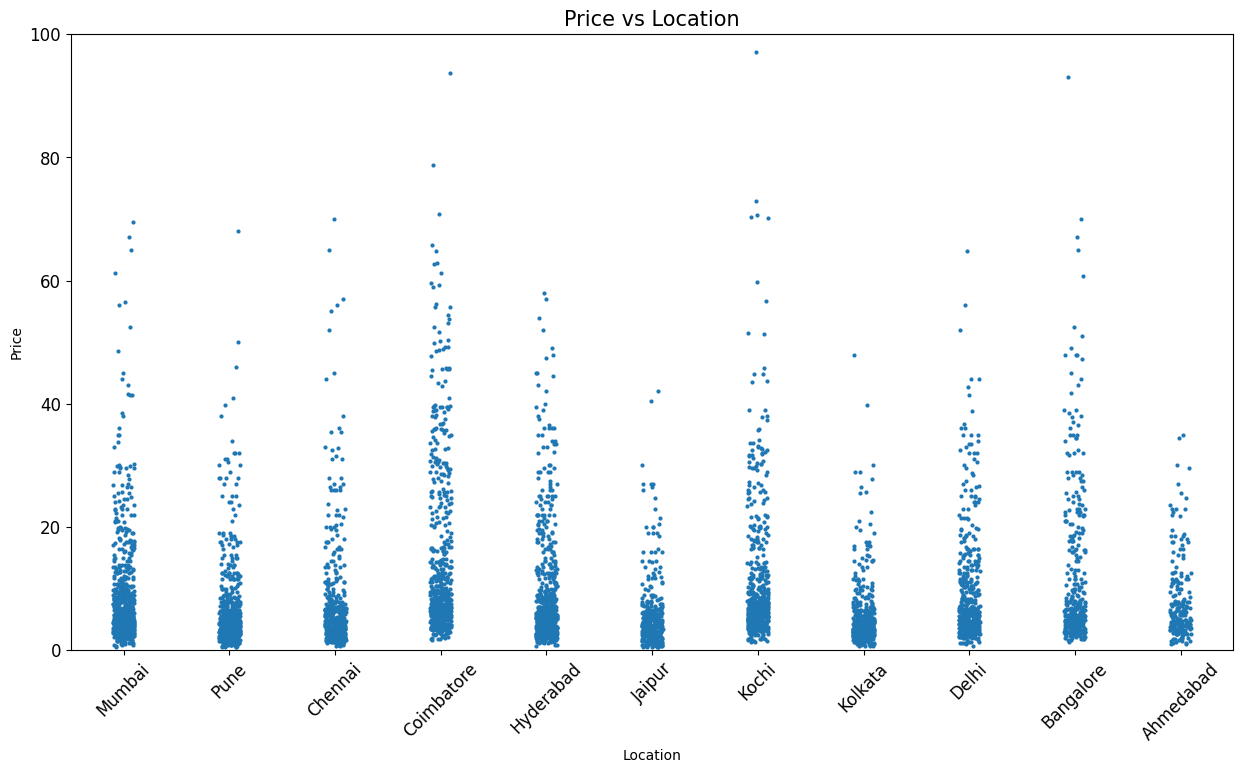

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Location', y='Price', data=df, size=3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Location', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.3.3 Price vs Owner_Type</b></h3>
</div>

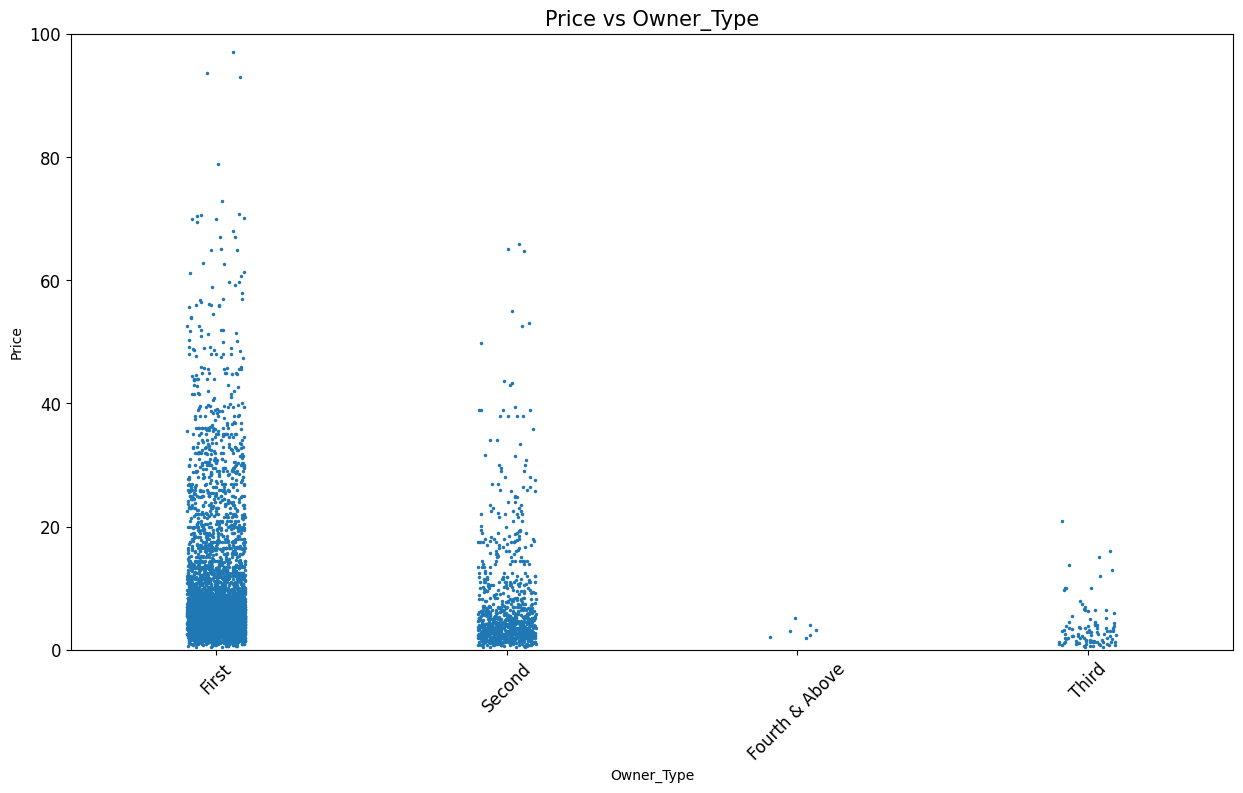

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Owner_Type', y='Price', data=df, size=2.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Owner_Type', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.3.4 Price vs Fuel_Type</b></h3>
</div>

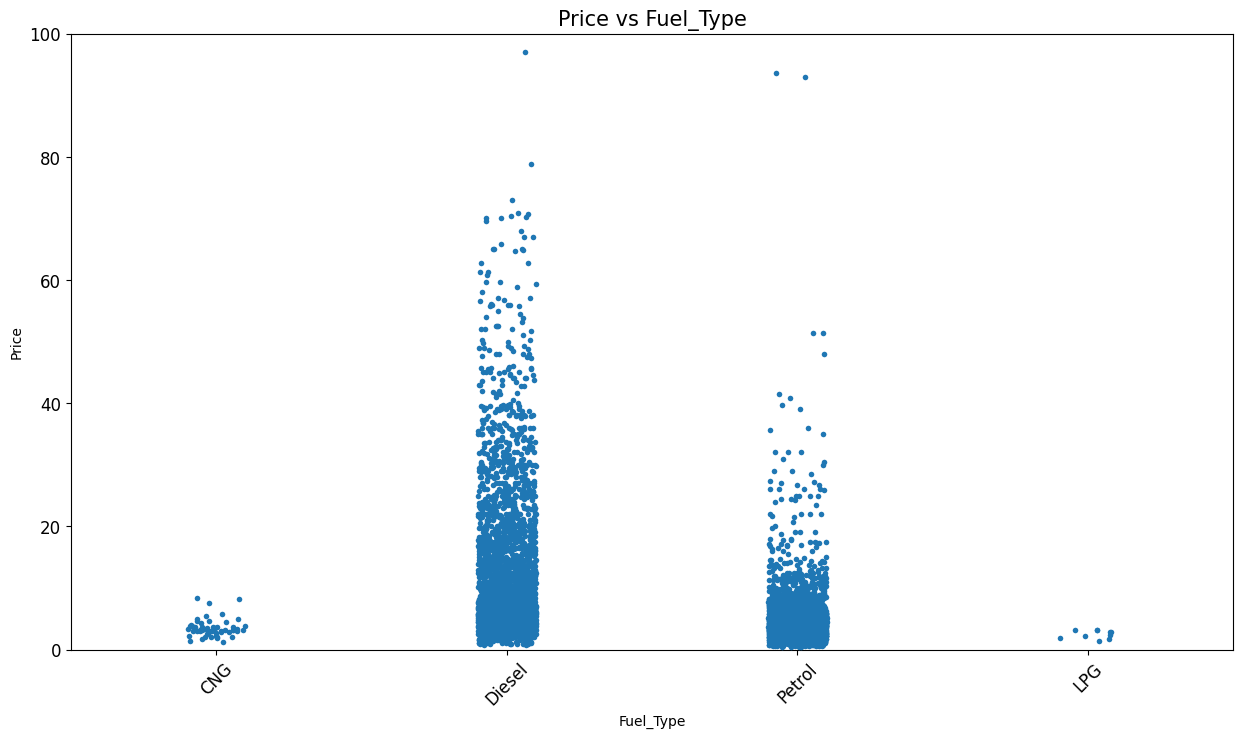

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Fuel_Type', y='Price', data=df, size=4)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Fuel_Type', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.3.5 Price vs Transmission</b></h3>
</div>

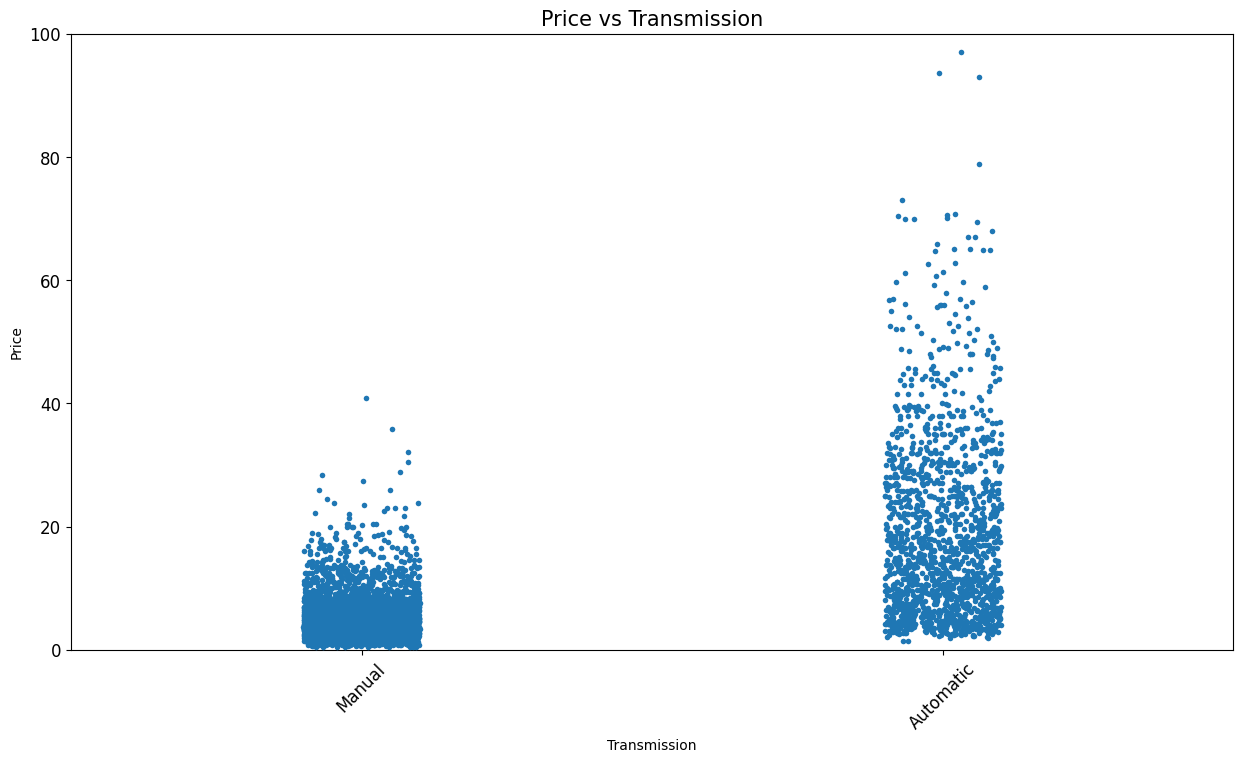

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Transmission', y='Price', data=df, size=4)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Transmission', size=15)
plt.show()

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- The manufacturer with the highest sales price is Mini Cooper. The lowest priced manufacturer is Maruti Suzuki. Since this data set is taken from India, it is natural for an Indian brand, which is a domestic manufacturer, to sell it to everyone.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- The vehicles sold by the second user are cheaper than the vehicles sold by the first user.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Gasoline vehicle prices are lower than diesel vehicles.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Automatic cars are more expensive than manual vehicles.</p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>5.4 Bivariate Analysis for Numerical Variables</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.4.1 - Price vs Year</b></h3>
</div>

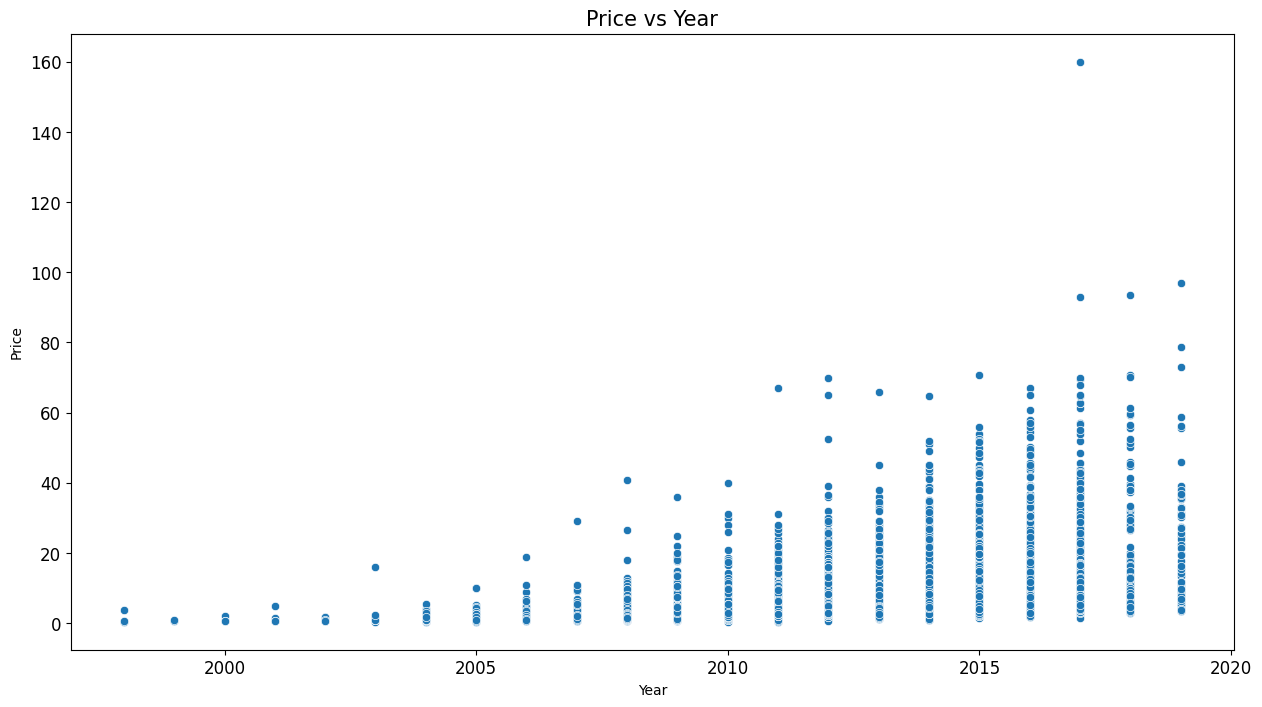

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Year', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Year', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.4.2 Price vs Kilometers_Driven</b></h3>
</div>

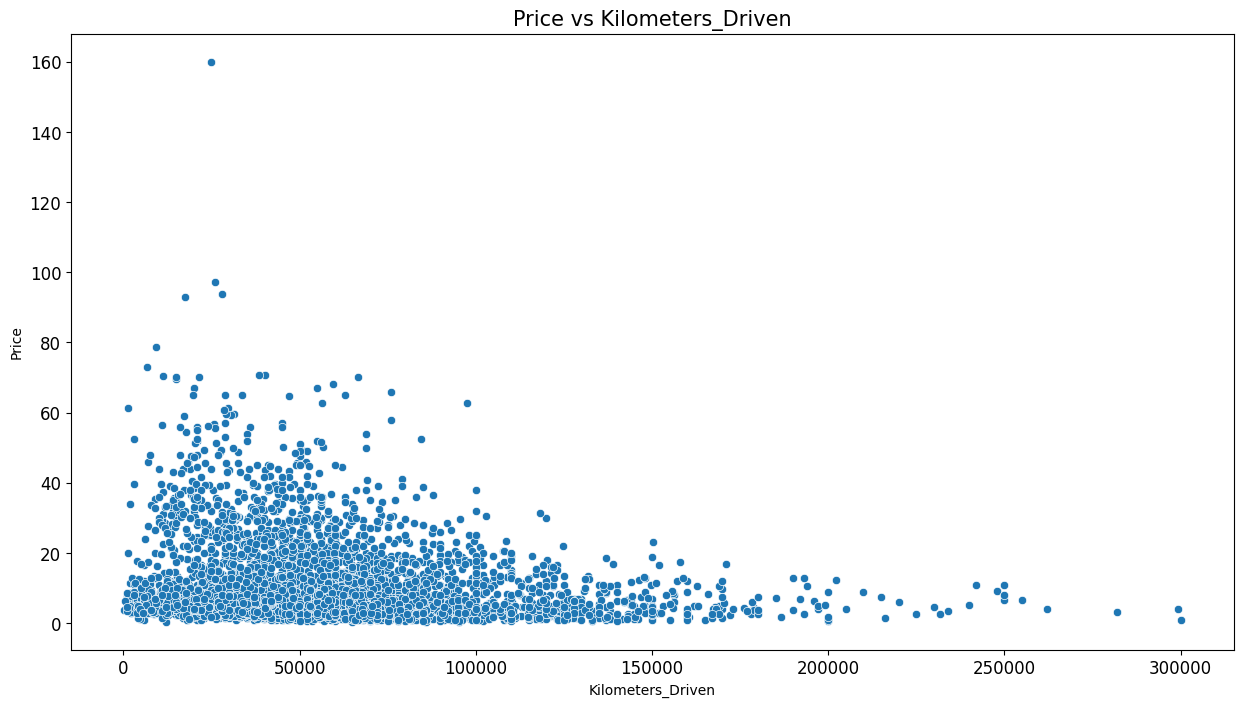

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Kilometers_Driven', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Kilometers_Driven', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.4.3 Price vs Mileage</b></h3>
</div>

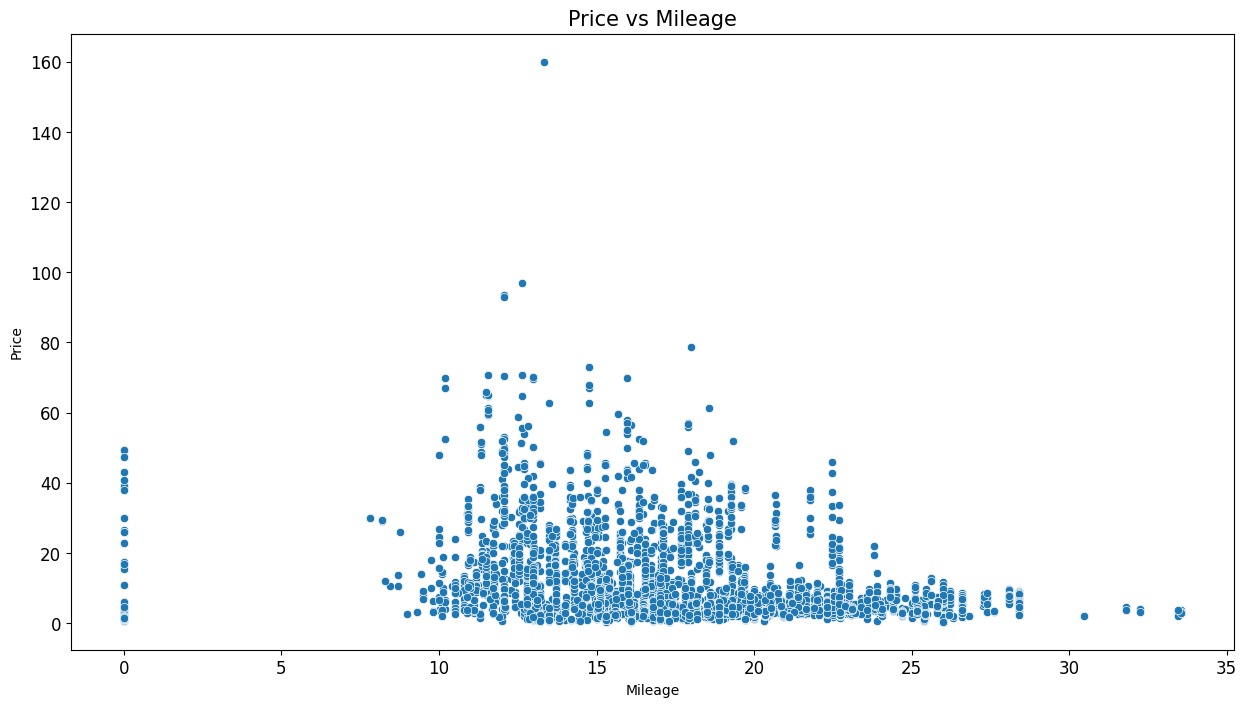

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Mileage', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.4.4 Price vs Engine</b></h3>
</div>

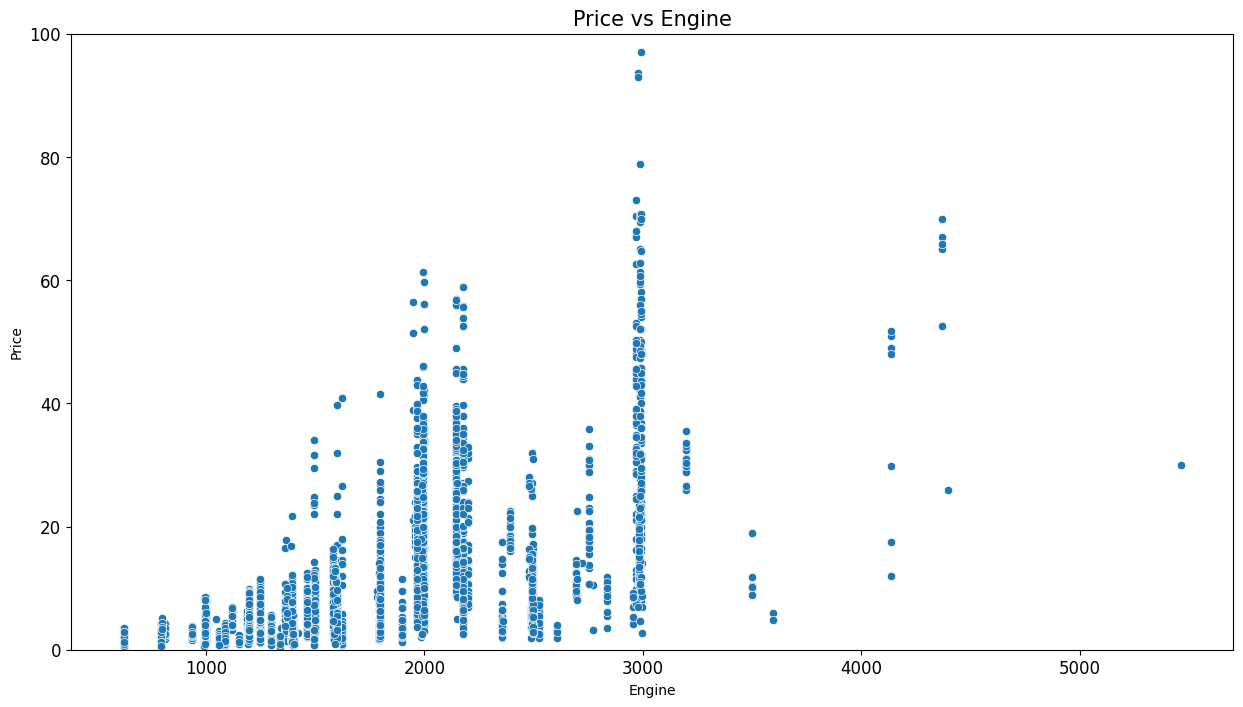

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Engine', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Engine', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.4.5 Price vs Power</b></h3>
</div>

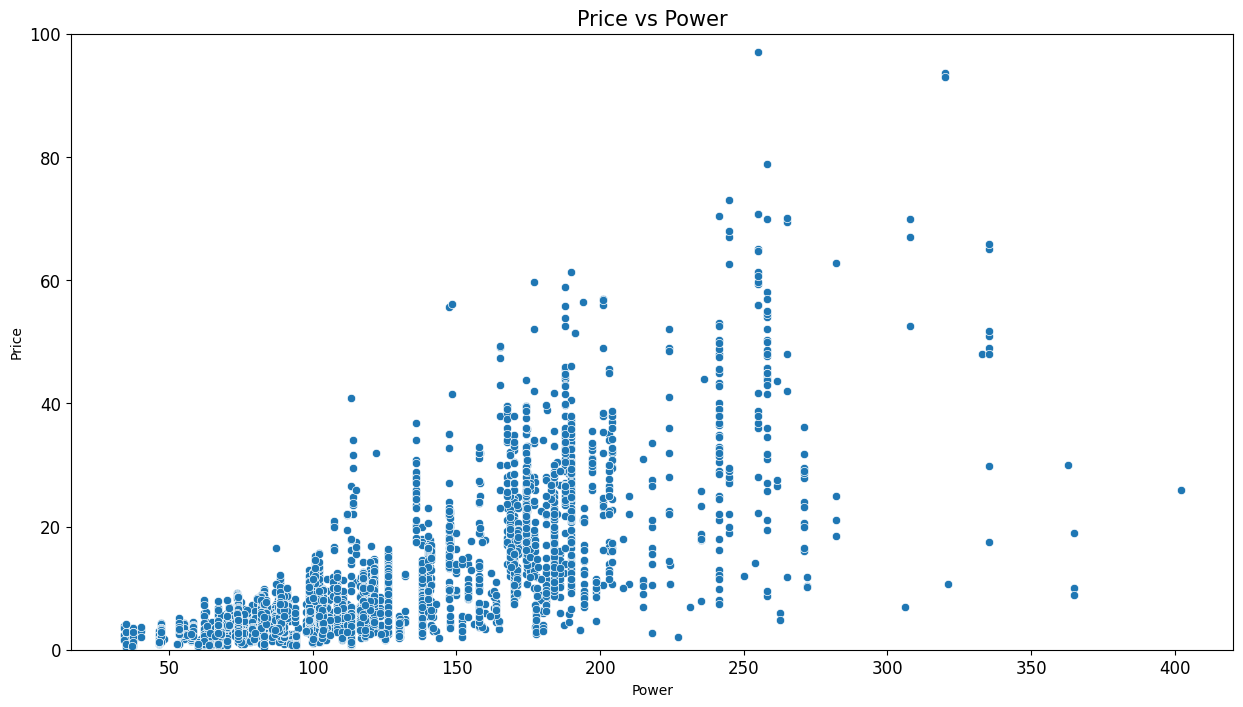

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Power', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Power', size=15)
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>5.4.6 Price vs Seats</b></h3>
</div>

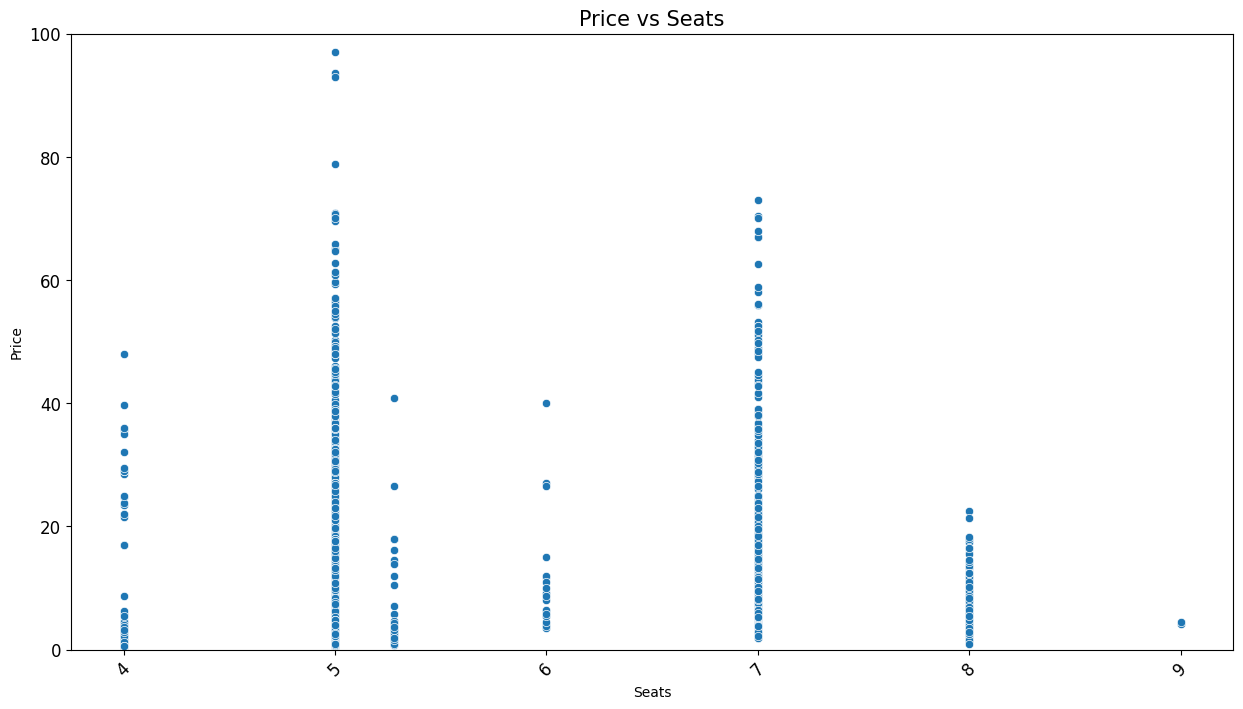

In [ ]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Seats', y='Price')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Seats', size=15)
plt.show()

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- As the mileage of the vehicle increases, the sales price decreases.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- As the car gets older, its sales price decreases.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- As the number of users increases, the sales price decreases.</p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step.6 Converting Categorical Values (Encoding)</b></h3>
</div>

In [ ]:
CatCols = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission']

df = pd.get_dummies(df, columns=CatCols, drop_first=True)
df.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_bmw,Company_chevrolet,Company_fiat,...,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,False,...,False,False,False,False,True,False,True,False,False,False


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            When performing regression modelling, it is often recommended to convert categorical data to numerical format. This transformation is necessary for the model to understand and process categorical data.
        </h3>
    </div>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>Step.7 Correlation Matrix</b></h3>
</div>

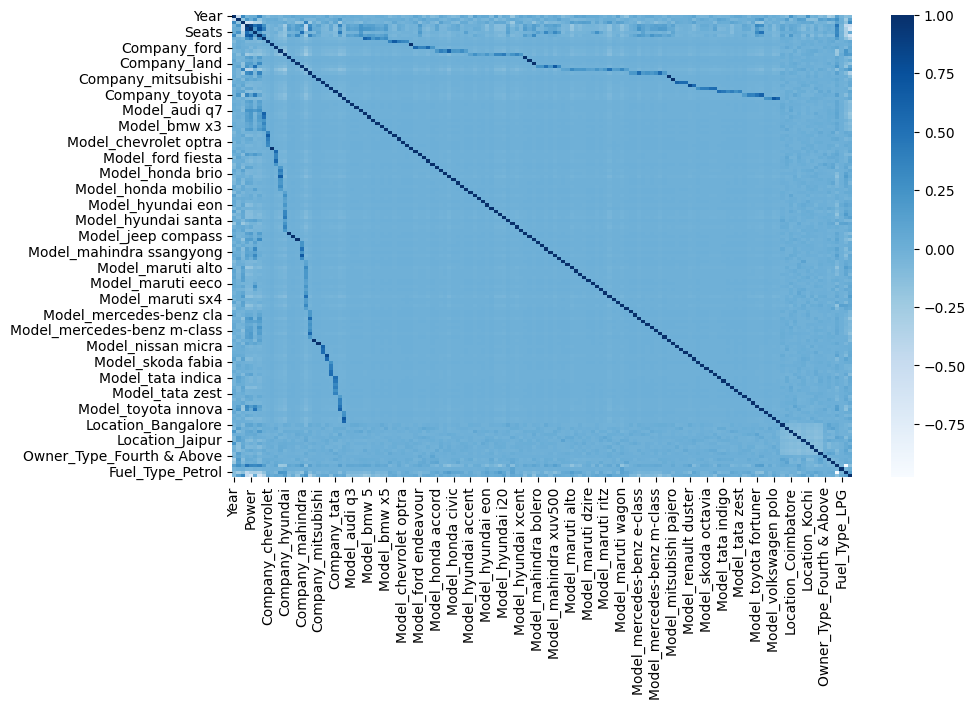

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='Blues')
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step.8 Linear Regression</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>8.1 Determining Features and Target Variables</b></h3>
</div>

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>8.2 Train-Test-Split</b></h3>
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            Since the Data Set is large, choosing "test_size" as 0.2 will be sufficient for modeling.
        </h3>
    </div>
</div>

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4504, 146)
X_test shape:  (1126, 146)
y_train shape:  (4504,)
y_test shape:  (1126,)


<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>8.3 Creating a Model</b></h3>
</div>

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>8.4 Evaluating the Model</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>8.4.1 Creating Functions for Model Evaluation</b></h3>
</div>

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; font-size: 18px;">
    <div style="text-align: left;">
        <p><strong>There are some performance measures used in statistics and data analysis processes. These metrics are used to evaluate a model's predictive ability and success. These metrics include Mean Absolute Error (MAE), Mean Square Error (MSE), Root Mean Square Error (RMSE), and R-Squared Score (R^2).</strong></p>
        <ol>
            <li><strong>Mean Absolute Error (MAE):</strong> It expresses the average of the absolute values of the differences between the predicted values and the actual values. A lower MAE value indicates that the model is performing better and its predictions are closer to the true values. This measurement is used to evaluate the accuracy of the model in regression problems. </li>
            <li><strong>Mean Square Error (MSE):</strong> It represents the average of the squared differences between predicted values and actual values. The value of MSE is always positive. The MSE value generally emphasizes large error values because the impact of large errors is increased by squaring the differences. It is used to evaluate the accuracy of the model in regression problems. </li>
            <li><strong>Root Mean Square Error (RMSE):</strong> It is calculated by taking the square root of MSE. RMSE allows errors to be interpreted by returning them to the original unit of measurement and is a derivative of MSE. It is used to evaluate the accuracy of the model in regression problems.</li>
            <li><strong>R-Squared Score (R^2):</strong> It is a metric that measures how well a regression model fits the data. This score indicates how much of the variance on the dependent variable is explained by the independent variables. R^2 takes a value between 0 and 1.</li>
        </ol>
        <p><strong>When these metrics are used together, you can more comprehensively evaluate a model's performance. For example:</strong></p>
        <ul>
            <li>Lower MAE and RMSE values indicate that a better model makes fewer errors.</li>
            <li>There is a direct relationship between MSE and RMSE because RMSE is the square root of MSE.</li>
            <li>The R-Squared Score indicates how well the fit to the data is. The closer it is to 1, the better the model fits the data. As it approaches 0, the model becomes less able to fit the data.</li>
        </ul>
        <p><strong>In summary, by using these metrics together, it is possible to understand and compare the performance of a model. Lower error values (MAE, MSE, RMSE) and higher R-Squared Score indicate the presence of a better model.</strong></p>
    </div>
</div>

In [ ]:
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            Model evaluation metrics have been defined and the model evaluation phase can be started.
        </h3>
    </div>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 16px;"><b>8.4.2 Model Evaluation</b></h3>
</div>

In [ ]:
y_pred = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score = list()
test_score = list()

train_score.append(lin_reg.score(X_train,y_train))
test_score.append(lin_reg.score(X_test,y_test))

MAE: 2.344392293830625
MSE: 16.76468659307658
RMSE: 4.094470245718801
R2 Score: 0.8298880636597245


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- The model explains 83% of the data. These results show that the model performs well overall, but there may be opportunities for improvement at some points. Especially the high MSE value may suggest that the model makes major errors at some points. Therefore, we can consider that the model has the potential for further improvement.</p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step.9 Ridge Regression</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>9.1 Creating a Model</b></h3>
</div>

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>9.2 Model Evaluation</b></h3>
</div>

In [ ]:
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(ridge.score(X_train,y_train))
test_score.append(ridge.score(X_test,y_test))

MAE: 2.3507827272224247
MSE: 16.65612725663982
RMSE: 4.081191891670842
R2 Score: 0.8309896195299487


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- The R2 Score is higher for the ridge regression model, meaning it appears to explain slightly more of the variance in the data set. </p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Ridge regression can outperform linear regression in some cases because it is used to reduce overfitting problems of the linear regression model by increasing the complexity of the data set. However, this is not generally valid; each data set and situation may be different. Therefore, the decision must be made considering the performance and context of both models.</p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step.10 Lasso Regression</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>10.1 Creating a Model</b></h3>
</div>

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>10.2 Model Evaluation</b></h3>
</div>

In [ ]:
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(lasso.score(X_train,y_train))
test_score.append(lasso.score(X_test,y_test))

MAE: 3.6346470821337573
MSE: 32.069448531176846
RMSE: 5.662989363505537
R2 Score: 0.6745900403973999


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- While the Lasso Regression model has significantly higher values in MAE and MSE metrics, it is the model with the highest RMSE value. This indicates that Lasso Regression has higher error values where the predictions are further away from the true values. </p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- In terms of R2 Score, the Lasso Regression model has a lower value than the other two models. This indicates that the Lasso Regression model is less successful than other models in explaining the variance in the data set.</p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step.11 Elastic-Net Regression</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>11.1 Creating a Model</b></h3>
</div>

In [ ]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

ElasticNet()

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>11.2 Model Evaluation</b></h3>
</div>

In [ ]:
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(elastic_net.score(X_train,y_train))
test_score.append(elastic_net.score(X_test,y_test))

MAE: 3.639278398178015
MSE: 32.05148233429089
RMSE: 5.6614028592117425
R2 Score: 0.6747723441060898


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- The values of Elastic Net Regression are very similar to Lasso Regression.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Considering these metrics, it can be said that Elastic Net Regression slightly underperforms compared to other regression models.</p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step.12 Random Forest Regression</b></h3>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>12.1 Creating a Model</b></h3>
</div>

In [ ]:
random_forest = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5)
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50)

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px;"><b>12.2 Model Evaluation</b></h3>
</div>

In [ ]:
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(random_forest.score(X_train,y_train))
test_score.append(random_forest.score(X_test,y_test))

MAE: 1.350870978746942
MSE: 6.106870399504736
RMSE: 2.4712082873575705
R2 Score: 0.9380333450988649


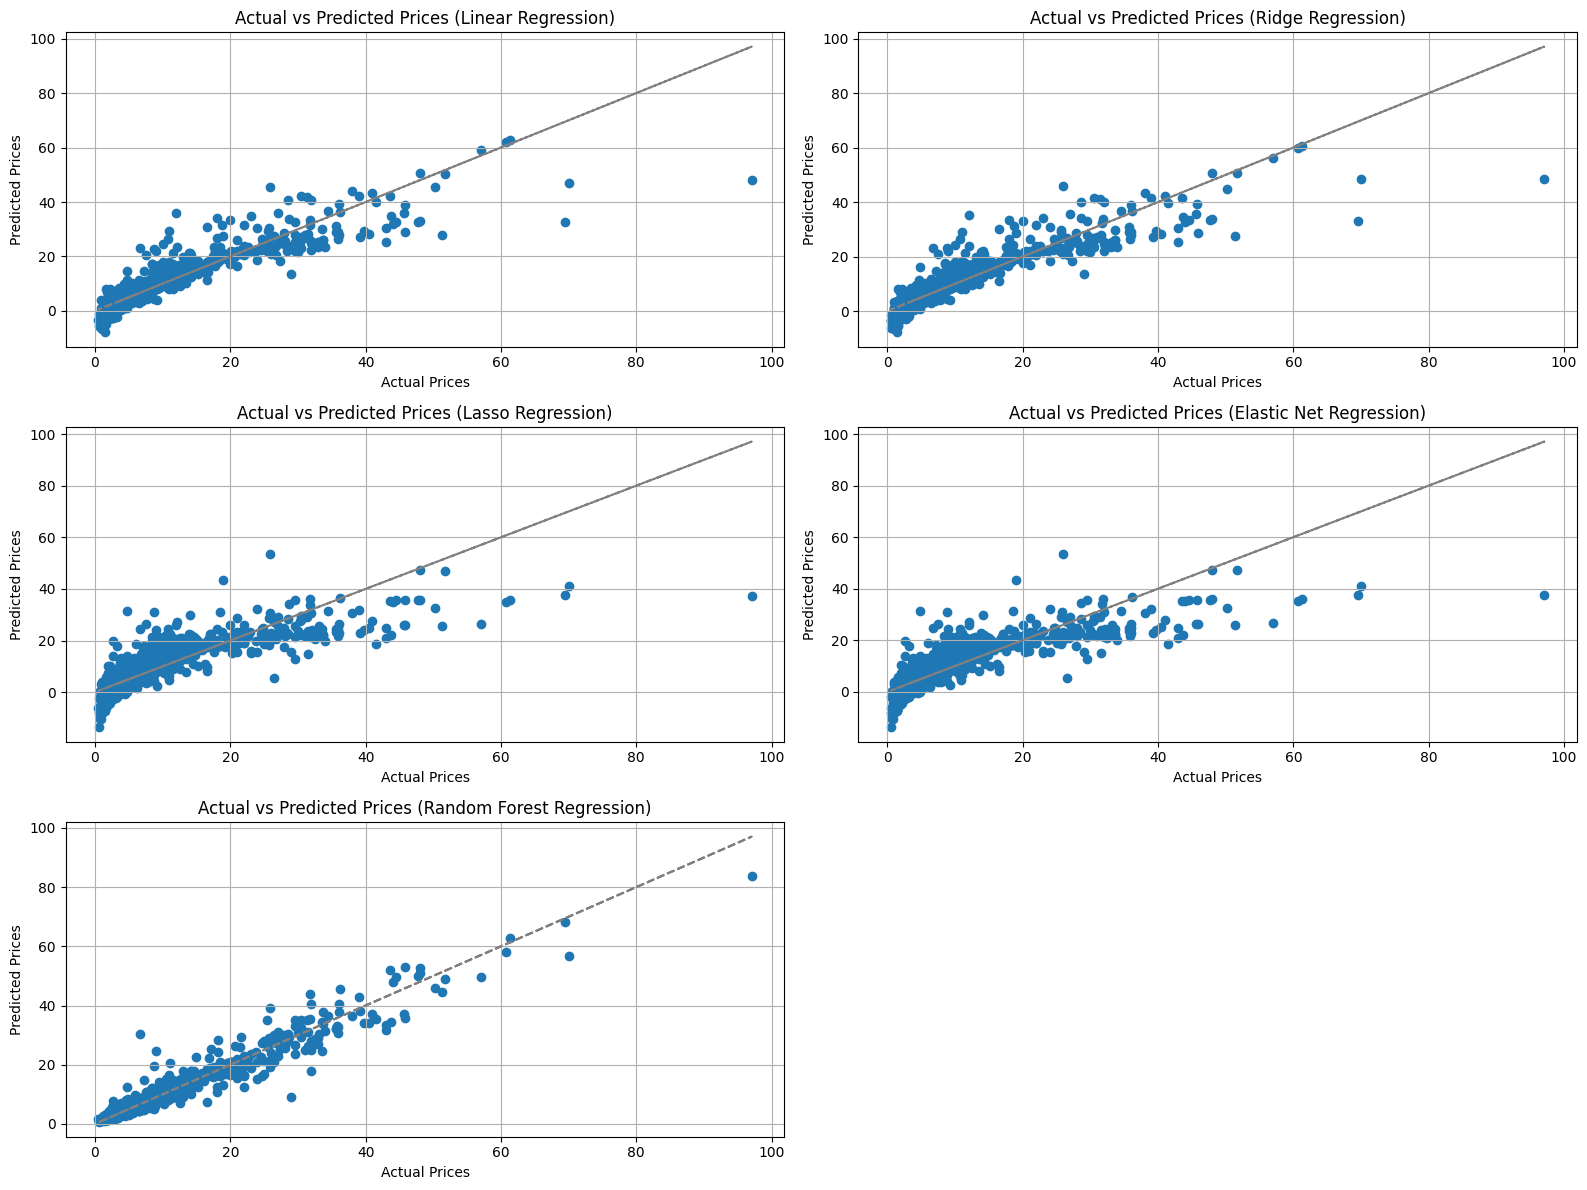

In [ ]:
import matplotlib.pyplot as plt

# Define function for plotting actual vs predicted prices
def plot_actual_vs_predicted(ax, model_name, y_test, predictions):
    ax.scatter(y_test, predictions)
    ax.plot(y_test, y_test, color='gray', linestyle='--')
    ax.set_title(f'Actual vs Predicted Prices ({model_name})')
    ax.set_xlabel('Actual Prices')
    ax.set_ylabel('Predicted Prices')
    ax.grid(True)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
axs = axs.flatten()

# Linear Regression
plot_actual_vs_predicted(axs[0], 'Linear Regression', y_test, lin_reg_predictions)

# Ridge Regression
plot_actual_vs_predicted(axs[1], 'Ridge Regression', y_test, ridge_predictions)

# Lasso Regression
plot_actual_vs_predicted(axs[2], 'Lasso Regression', y_test, lasso_predictions)

# Elastic Net Regression
plot_actual_vs_predicted(axs[3], 'Elastic Net Regression', y_test, elastic_net_predictions)

# Random Forest Regression
plot_actual_vs_predicted(axs[4], 'Random Forest Regression', y_test, random_forest_predictions)

# Hide the empty subplot
axs[5].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>Conclusion:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Random Forest Regression has very low MAE, MSE and RMSE values compared to other regression models. This indicates that the estimates are quite close to the actual values.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- It also shows that it can explain 94.51% of the variance in the data set in terms of R2 Score.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- Random Forest Regression has lower error values and higher explanatory power than other models. This may suggest that there may be a better model for the data set. </p>
</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 20px;"><b>Step.13 Conclusion</b></h3>
</div>

In [ ]:
model_names = ['Linear Regression','Ridge Regression','Lasso Regression','Elastic-Net Regression','Random Forest Regression']

scores = pd.DataFrame([model_names,train_score,test_score])
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Test Set Accuracy']

scores

,Model,Training Set Accuracy,Test Set Accuracy
0,Linear Regression,0.833643,0.829888
1,Ridge Regression,0.833144,0.83099
2,Lasso Regression,0.667695,0.67459
3,Elastic-Net Regression,0.667971,0.674772
4,Random Forest Regression,0.968371,0.938033


<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; font-family: 'Times New Roman', Times, serif; text-align: left;">
    <h3 style="color: black; font-size: 18px; font-weight: normal;">
        <strong>This table shows the training set accuracy and test set accuracy of different regression models. According to the results in the table:</strong>
    </h3>
    <p style="color: black; font-size: 18px; font-weight: normal;">- <strong>Linear Regression</strong> performs well overall and performs similarly on the training and test sets, which may indicate there are no signs of overfitting or underfitting.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- <strong>Ridge Regression	</strong> performs similar to linear regression on the training set, but achieves a slightly better result on the test set. This may indicate that it is generally more resistant to overfitting.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- <strong>Lasso Regression	</strong> achieves lower accuracy compared to other regression methods. The model may be underperforming on the training and test sets. This could perhaps be discarding important features in the data.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- <strong>Elastic-Net Regression	</strong> performs similar to Lasso Regression.</p>
    <p style="color: black; font-size: 18px; font-weight: normal;">- <strong>Random Forest Regression	</strong> achieves very high accuracy on training and test sets compared to other regression models. However, the difference between the training and test set is slightly high, which may indicate overfitting. <em>Therefore, when choosing the best model, it is important to consider factors such as overfitting and the generalization ability of the model.</em></p>
</div>

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px;">
    <div style="font-family: 'Times New Roman', Times, serif; text-align: left;">
        <h3 style="color: black; font-size: 18px; font-weight: normal;">
            Considering the overfitting situation of <em><strong>Random Forest Regression</strong></em>, it would be more logical to choose <em><strong>Ridge Regression</strong></em> for the modelling phase.
        </h3>
    </div>
</div>

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; text-align: center;">
    <div style="font-family: 'Times New Roman', Times, serif;">
        <h3 style="color: black; font-size: 18px; font-weight: bold;">
            I hope it was useful. Thank you for your time! 👋
        </h3>
    </div>
</div>

<div style="border: 2px solid #000000; border-radius: 5px; padding: 10px; text-align: center;">
    <div style="font-family: 'Times New Roman', Times, serif;">
        <h3 style="color: black; font-size: 18px; font-weight: bold;">
            Berkay Bekci - bekci.berkay1@gmail.com
        </h3>
    </div>
</div>